In [1]:
!pip install opencv-python


In [2]:
!pip install tensorflow

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
def load_images_from_folder(folder, label, limit_per_class=1000):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(folder):
        if filename.endswith('.BMP'):
            img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (96, 96))
            if img is not None:
                images.append(img)
                labels.append(label)
                count += 1
        if count >= limit_per_class:
            break
    return images, labels

real_path = r"C:\Users\NIT\Downloads\archive (3)\SOCOFing\Real"
altered_path = r"C:\Users\NIT\Downloads\archive (3)\SOCOFing\Altered\Altered-Hard"

real_imgs, real_labels = load_images_from_folder(real_path, 0)
altered_imgs, altered_labels = load_images_from_folder(altered_path, 1)

X = np.array(real_imgs + altered_imgs)
y = np.array(real_labels + altered_labels)

X = X / 255.0  # normalize
X = X.reshape(-1, 96, 96, 1)
y = to_categorical(y, 2)

In [5]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

inputs = Input(shape=(96, 96, 1))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6824 - loss: 0.5912 - val_accuracy: 0.9250 - val_loss: 0.2187
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8948 - loss: 0.2680 - val_accuracy: 0.9350 - val_loss: 0.1862
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9256 - loss: 0.2034 - val_accuracy: 0.9350 - val_loss: 0.1738
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9352 - loss: 0.1740 - val_accuracy: 0.9425 - val_loss: 0.1385
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9333 - loss: 0.1621 - val_accuracy: 0.9550 - val_loss: 0.1280
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9521 - loss: 0.1183 - val_accuracy: 0.9575 - val_loss: 0.1150
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9464 - loss: 0.1392 - val_accuracy: 0.9550 - val_loss: 0.1093
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9740 - loss: 0.0828 - val_accuracy: 0.9625 - v

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9563 - loss: 0.1083
Test Accuracy: 0.9549999833106995


In [8]:
from tensorflow.keras.models import Model 


In [9]:

feature_model = Model(inputs=model.input, outputs=model.layers[-3].output)

# Extract features for two fingerprints
def get_feature_vector(image):
    image = image.reshape(1, 96, 96, 1)
    return feature_model.predict(image)[0]

vec1 = get_feature_vector(X_test[0])
vec2 = get_feature_vector(X_test[1])

# Cosine similarity for matching
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity([vec1], [vec2])
print("Similarity:", sim[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Similarity: 0.46943823


In [10]:
threshold = 0.8

def authenticate(img1, img2):
    f1 = get_feature_vector(img1)
    f2 = get_feature_vector(img2)
    similarity = cosine_similarity([f1], [f2])[0][0]
    print("Similarity Score:", similarity)
    return similarity > threshold

In [11]:
authenticate(X_test[0],X_test[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Similarity Score: 0.46943823


False

In [12]:
X = np.repeat(X, 3, axis=-1)  

In [13]:
from tensorflow.keras.applications import (
    ResNet50, ResNet101, InceptionV3,
    EfficientNetB0, DenseNet121, MobileNetV2,VGG16
)
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def create_model(backbone_fn, input_shape=(96, 96, 3), num_classes=2):
    base_model = backbone_fn(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = True  

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [14]:
resnet_model = create_model(ResNet50)
vgg_model = create_model(VGG16)
efficient_model = create_model(EfficientNetB0)
ResNet101_model=create_model(ResNet101)
inceptionV3_model=create_model(InceptionV3)
densenet_model=create_model(DenseNet121)
mobilenet_model=create_model(MobileNetV2)

In [15]:
history_r=resnet_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 545ms/step - accuracy: 0.8463 - loss: 0.3981 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 530ms/step - accuracy: 0.9685 - loss: 0.1091 - val_accuracy: 0.0000e+00 - val_loss: 6.1077
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 533ms/step - accuracy: 0.9889 - loss: 0.0396 - val_accuracy: 0.0000e+00 - val_loss: 1.6101
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 525ms/step - accuracy: 0.9959 - loss: 0.0119 - val_accuracy: 0.0000e+00 - val_loss: 1.7142
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 528ms/step - accuracy: 0.9967 - loss: 0.0093 - val_accuracy: 0.0000e+00 - val_loss: 4.5167
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 524ms/step - accuracy: 0.9873 - loss: 0.0373 - val_accuracy: 0.0000e+00 - val_loss: 1.2433
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 529ms/step - accuracy: 0.9884 - loss: 0.0228 - val_accuracy: 0.0000e+00 - val_loss: 2.1493
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 524ms/step - accuracy: 0.99

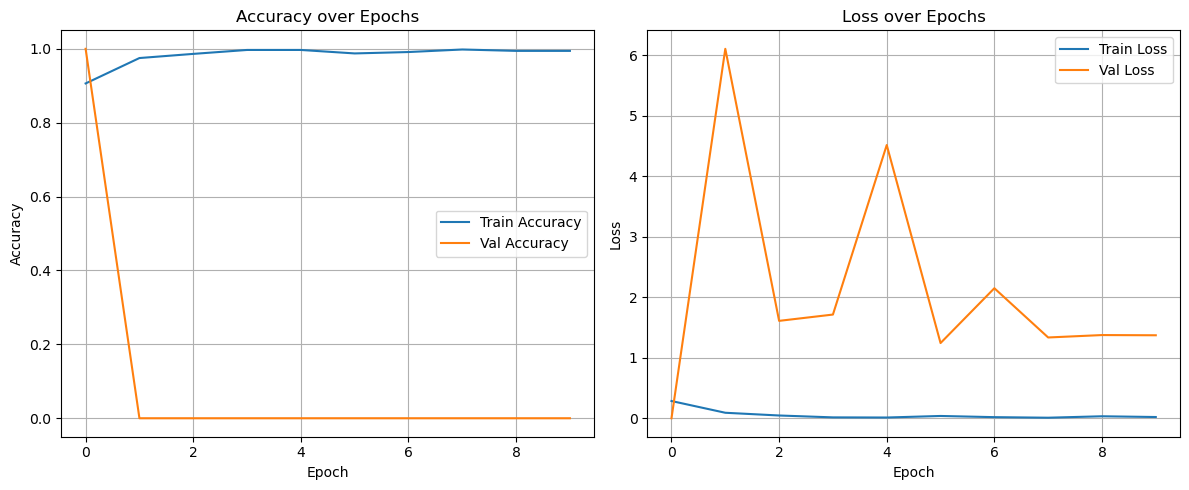

In [16]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_r.history['accuracy'], label='Train Accuracy')
plt.plot(history_r.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_r.history['loss'], label='Train Loss')
plt.plot(history_r.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [33]:
history_v=vgg_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 721ms/step - accuracy: 0.6034 - loss: 1.6682 - val_accuracy: 0.0000e+00 - val_loss: 0.8399
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 844ms/step - accuracy: 0.6244 - loss: 0.6677 - val_accuracy: 0.0000e+00 - val_loss: 1.1650
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 845ms/step - accuracy: 0.5877 - loss: 0.6804 - val_accuracy: 0.0000e+00 - val_loss: 0.7743
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 848ms/step - accuracy: 0.6366 - loss: 0.6728 - val_accuracy: 0.0000e+00 - val_loss: 0.7520
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 842ms/step - accuracy: 0.6314 - loss: 0.6654 - val_accuracy: 0.0000e+00 - val_loss: 0.8445
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 845ms/step - accuracy: 0.6042 - loss: 0.6707 - val_accuracy: 0.0000e+00 - val_loss: 0.8885
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 848ms/step - accuracy: 0.6269 - loss: 0.6941 - val_accuracy: 0.0000e+00 - val_loss: 1.8924
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 842ms/step - accuracy: 0.61

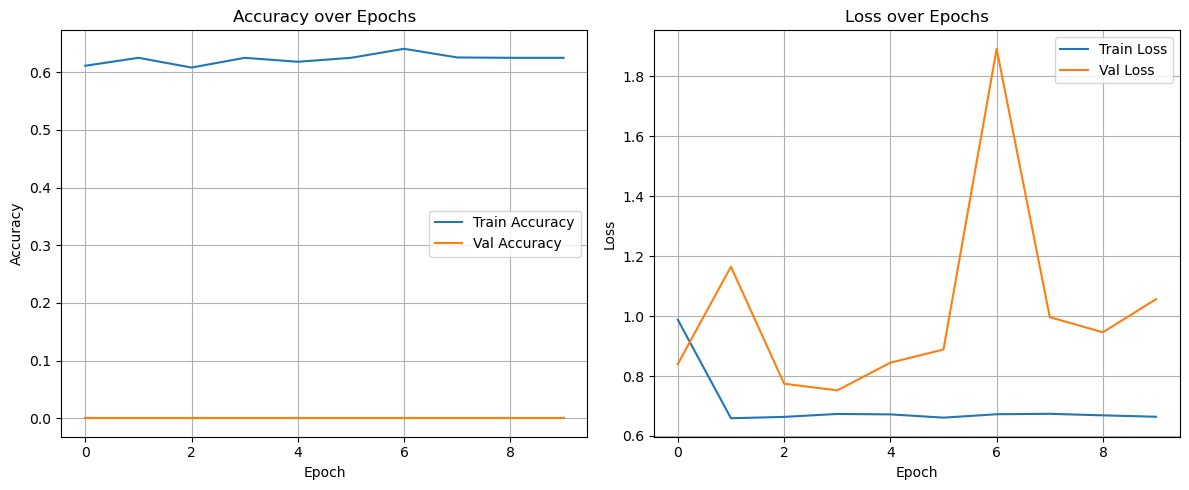

In [34]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_v.history['accuracy'], label='Train Accuracy')
plt.plot(history_v.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_v.history['loss'], label='Train Loss')
plt.plot(history_v.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
history_e=efficient_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 315ms/step - accuracy: 0.8229 - loss: 0.3698 - val_accuracy: 0.0000e+00 - val_loss: 4.8938
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.9777 - loss: 0.0672 - val_accuracy: 0.0000e+00 - val_loss: 1.4119
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - accuracy: 0.9927 - loss: 0.0215 - val_accuracy: 0.0000e+00 - val_loss: 3.3263
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 290ms/step - accuracy: 0.9894 - loss: 0.0261 - val_accuracy: 0.0000e+00 - val_loss: 3.1418
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.9954 - loss: 0.0179 - val_accuracy: 0.0000e+00 - val_loss: 4.8813
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - accuracy: 0.9885 - loss: 0.0352 - val_accuracy: 0.0000e+00 - val_loss: 3.7018
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.0000e+00 - val_loss: 6.9696
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - accuracy: 0.98

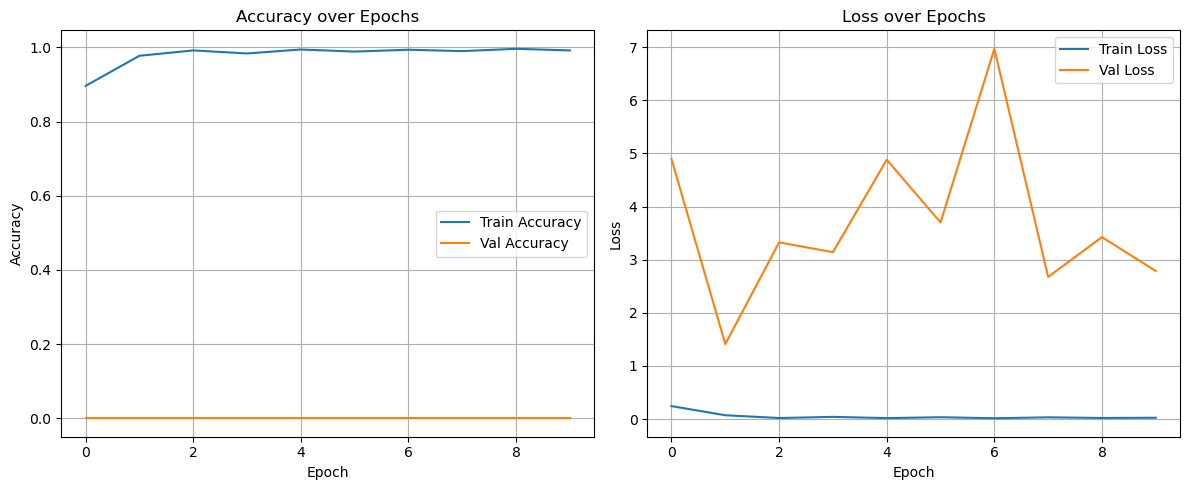

In [41]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_e.history['accuracy'], label='Train Accuracy')
plt.plot(history_e.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_e.history['loss'], label='Train Loss')
plt.plot(history_e.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
history_r1=ResNet101_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 973ms/step - accuracy: 0.8418 - loss: 0.7142 - val_accuracy: 0.0000e+00 - val_loss: 38699.2461
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 925ms/step - accuracy: 0.9522 - loss: 0.1491 - val_accuracy: 0.0000e+00 - val_loss: 3.3413
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 920ms/step - accuracy: 0.9829 - loss: 0.0507 - val_accuracy: 0.0000e+00 - val_loss: 1.6705
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 927ms/step - accuracy: 0.9867 - loss: 0.0319 - val_accuracy: 0.0000e+00 - val_loss: 3.2194
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 920ms/step - accuracy: 0.9848 - loss: 0.0604 - val_accuracy: 0.0000e+00 - val_loss: 1.2270
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 935ms/step - accuracy: 0.9919 - loss: 0.0120 - val_accuracy: 0.0000e+00 - val_loss: 1.1734
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 917ms/step - accuracy: 0.9977 - loss: 0.0094 - val_accuracy: 0.0000e+00 - val_loss: 0.8696
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 951ms/step - accuracy: 

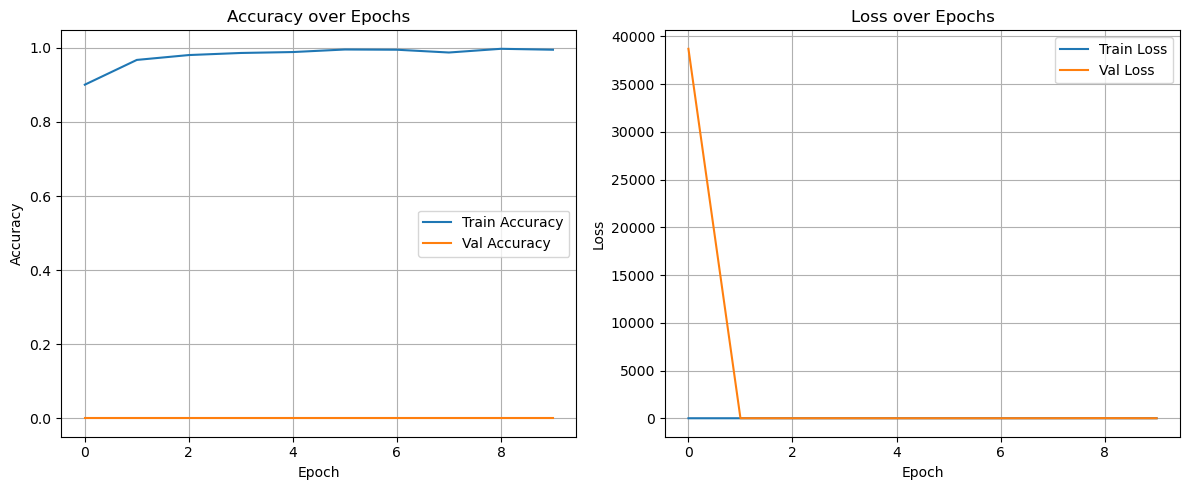

In [43]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_r1.history['accuracy'], label='Train Accuracy')
plt.plot(history_r1.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_r1.history['loss'], label='Train Loss')
plt.plot(history_r1.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [44]:
history_i=inceptionV3_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 381ms/step - accuracy: 0.7945 - loss: 0.4357 - val_accuracy: 0.4650 - val_loss: 10.8772
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 364ms/step - accuracy: 0.9393 - loss: 0.1793 - val_accuracy: 0.9625 - val_loss: 1.0344
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 377ms/step - accuracy: 0.9729 - loss: 0.0672 - val_accuracy: 0.9700 - val_loss: 0.0972
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.9903 - loss: 0.0269 - val_accuracy: 0.9925 - val_loss: 0.0399
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 360ms/step - accuracy: 0.9859 - loss: 0.0388 - val_accuracy: 0.9975 - val_loss: 0.0080
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 359ms/step - accuracy: 0.9870 - loss: 0.0328 - val_accuracy: 0.9850 - val_loss: 0.0491
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 360ms/step - accuracy: 0.9937 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 8.3283e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - accuracy: 0.9914 - loss: 0.0499 - val

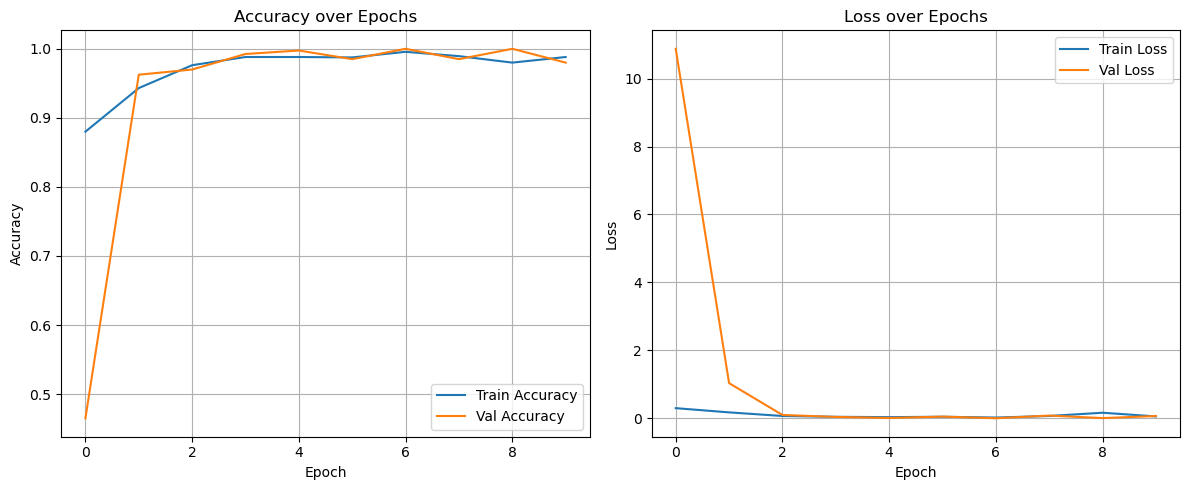

In [45]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_i.history['accuracy'], label='Train Accuracy')
plt.plot(history_i.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_i.history['loss'], label='Train Loss')
plt.plot(history_i.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
history_d=densenet_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 860ms/step - accuracy: 0.8351 - loss: 0.4473 - val_accuracy: 0.7725 - val_loss: 1.7432
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 754ms/step - accuracy: 0.9899 - loss: 0.0349 - val_accuracy: 0.8775 - val_loss: 0.9687
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 774ms/step - accuracy: 0.9893 - loss: 0.0424 - val_accuracy: 0.0100 - val_loss: 214.3587
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 773ms/step - accuracy: 0.9835 - loss: 0.0543 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 767ms/step - accuracy: 0.9966 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 5.5633e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 761ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9900 - val_loss: 0.0362
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 765ms/step - accuracy: 0.9932 - loss: 0.0245 - val_accuracy: 0.9950 - val_loss: 0.0080
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 765ms/step - accuracy: 0.9923 - loss: 0.0313 

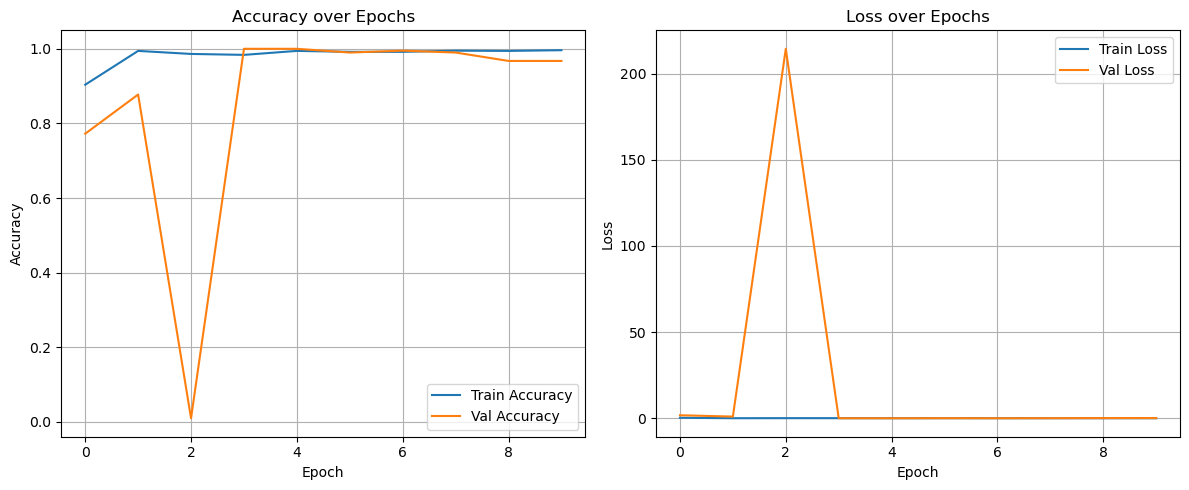

In [47]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_d.history['accuracy'], label='Train Accuracy')
plt.plot(history_d.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_d.history['loss'], label='Train Loss')
plt.plot(history_d.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [49]:
history_m=mobilenet_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.8903 - loss: 0.3007 - val_accuracy: 0.0075 - val_loss: 74.5892
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 264ms/step - accuracy: 0.9745 - loss: 0.0546 - val_accuracy: 0.1075 - val_loss: 63.4231
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.9862 - loss: 0.0363 - val_accuracy: 0.2450 - val_loss: 46.0713
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 264ms/step - accuracy: 0.9955 - loss: 0.0162 - val_accuracy: 0.4475 - val_loss: 27.9575
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.9972 - loss: 0.0117 - val_accuracy: 0.6125 - val_loss: 17.4566
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 0.6625 - val_loss: 13.1914
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.6800 - val_loss: 14.1101
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 258ms/step - accuracy: 0.9940 - loss: 0.0177 - v

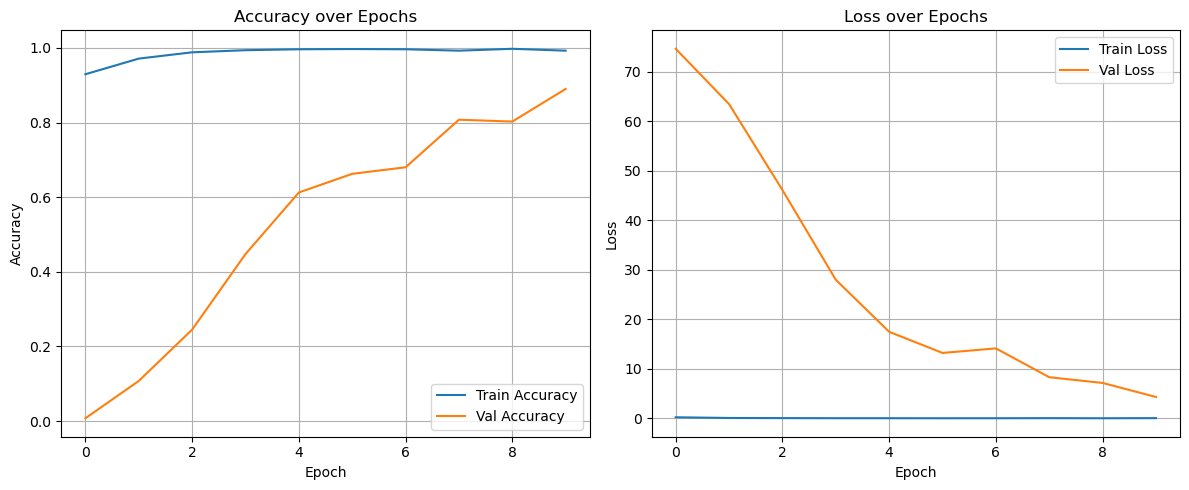

In [50]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_m.history['accuracy'], label='Train Accuracy')
plt.plot(history_m.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_m.history['loss'], label='Train Loss')
plt.plot(history_m.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()